In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/math-problem-categorization/sample_submission.csv
/kaggle/input/math-problem-categorization/train.csv
/kaggle/input/math-problem-categorization/test.csv


In [19]:
import pandas as pd
df = pd.read_csv('/kaggle/input/math-problem-categorization/train.csv')
df.head()

,problem,category
0,"At a ring toss game at a carnival, Marco throw...",19
1,What is `471 ÷ 100`? Interactive: Students fol...,22
2,Follow the directions below to create an equiv...,20
3,Solve the following system by substitution:\n`...,14
4,Solve the following system by substitution:\n`...,14


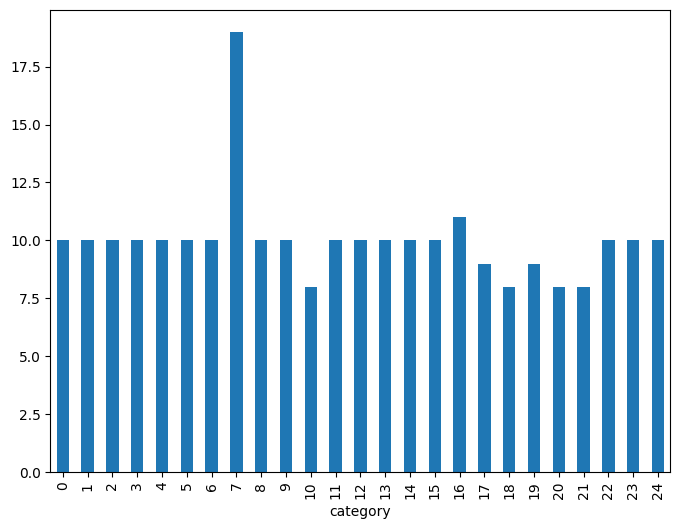

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('category').problem.count().plot.bar(ylim=0)
plt.show()

the graph shows that category 7 has more instances in the dataset than other instances. however as the disparencey isnt too much , we will leave it as is for now and focus on futher steps(avg instances of other elements is 10 while that of element 7 is 18 ) 

In [21]:
# import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score

# # Load the training data
# train_data = pd.read_csv('/kaggle/input/math-problem-categorization/train.csv')

# # Split the training data into features and labels
# X_train = train_data['problem']
# y_train = train_data['category']

# # Create a count vectorizer to convert text into numerical features
# vectorizer = CountVectorizer()
# X_train_vectorized = vectorizer.fit_transform(X_train)

# # Train the classifier
# classifier = MultinomialNB()
# classifier.fit(X_train_vectorized, y_train)

# # Load the test data
# test_data = pd.read_csv('/kaggle/input/math-problem-categorization/test.csv')

# # Preprocess the test data (if necessary)
# X_test = test_data['problem']

# # Vectorize the test data
# X_test_vectorized = vectorizer.transform(X_test)

# # Predict the labels for the test data
# y_pred = classifier.predict(X_test_vectorized)

# # Print the predicted labels
# print(y_pred)

# # Evaluate the accuracy (if ground truth labels are available)
# # ground_truth = pd.read_csv('ground_truth.csv')
# # y_true = ground_truth['category']
# # accuracy = accuracy_score(y_true, y_pred)
# # print('Accuracy:', accuracy)


In [22]:
# import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score

# # Load the training data
# train_data = pd.read_csv('/kaggle/input/math-problem-categorization/train.csv')

# # Split the training data into training and test sets
# train_data_len = len(train_data)
# X_train = train_data['problem'][:train_data_len-10]
# y_train = train_data['category'][:train_data_len-10]
# X_test = train_data['problem'][train_data_len-10:]
# y_test_actual = train_data['category'][train_data_len-10:]

# # Create a count vectorizer to convert text into numerical features
# vectorizer = CountVectorizer()
# X_train_vectorized = vectorizer.fit_transform(X_train)

# # Train the classifier
# classifier = MultinomialNB()
# classifier.fit(X_train_vectorized, y_train)

# # Vectorize the test data
# X_test_vectorized = vectorizer.transform(X_test)

# # Predict the labels for the test data
# y_test_pred = classifier.predict(X_test_vectorized)

# # Print the predicted labels
# print("Predicted Labels:", y_test_pred)

# # Print the actual labels
# print("Actual Labels:", list(y_test_actual))

# # Evaluate the accuracy
# accuracy = accuracy_score(y_test_actual, y_test_pred)
# print('Accuracy:', accuracy)


In [23]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
print(nltk.data.path)

['/root/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [26]:
# !unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/ 

In [27]:
# import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score
# import string
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer, WordNetLemmatizer
# from nltk.tokenize import word_tokenize

# # Load the training data
# train_data = pd.read_csv('/kaggle/input/math-problem-categorization/train.csv')

# # Split the training data into training and test sets
# train_data_len = len(train_data)
# X_train = train_data['problem'][:train_data_len-10]
# y_train = train_data['category'][:train_data_len-10]
# X_test = train_data['problem'][train_data_len-10:]
# y_test_actual = train_data['category'][train_data_len-10:]

# # Define stopwords, stemmer, and lemmatizer
# stopwords = set(stopwords.words('english'))
# stemmer = PorterStemmer()
# lemmatizer = WordNetLemmatizer()

# # Preprocess the text data
# def preprocess_text(text):
#     # Remove punctuation
#     text = text.translate(str.maketrans('', '', string.punctuation))

#     # Convert text to lowercase
#     text = text.lower()

#     # Tokenize the text into individual words
#     tokens = word_tokenize(text)

#     # Remove stop words
#     tokens = [word for word in tokens if word not in stopwords]

#     # Apply stemming and lemmatization
#     stemmed_tokens = [stemmer.stem(word) for word in tokens]
#     lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

#     # Join the processed tokens back into a single string
#     processed_text = ' '.join(lemmatized_tokens)

#     return processed_text

# # Preprocess the training data
# X_train_preprocessed = [preprocess_text(text) for text in X_train]

# # Create a count vectorizer to convert preprocessed text into numerical features
# vectorizer = CountVectorizer()
# X_train_vectorized = vectorizer.fit_transform(X_train_preprocessed)

# # Train the classifier
# classifier = MultinomialNB()
# classifier.fit(X_train_vectorized, y_train)

# # Preprocess the test data
# X_test_preprocessed = [preprocess_text(text) for text in X_test]

# # Vectorize the preprocessed test data
# X_test_vectorized = vectorizer.transform(X_test_preprocessed)

# # Predict the labels for the test data
# y_test_pred = classifier.predict(X_test_vectorized)

# # Print the predicted labels
# print("Predicted Labels:", y_test_pred)

# # Print the actual labels
# print("Actual Labels:", list(y_test_actual))

# # Evaluate the accuracy
# accuracy = accuracy_score(y_test_actual, y_test_pred)
# print('Accuracy:', accuracy)


this step adds some data preprocessing as well.accuracy did drop but i am hoping that is for the best . hope that it reduces ovefitting and overgeneralisation.

In [28]:
# import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score
# import string
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer, WordNetLemmatizer
# from nltk.tokenize import word_tokenize
# from scipy.sparse import csr_matrix

# # Load the training data
# train_data = pd.read_csv('/kaggle/input/math-problem-categorization/train.csv')

# # Split the training data into training and test sets
# train_data_len = len(train_data)
# X_train = train_data['problem'][:train_data_len-10]
# y_train = train_data['category'][:train_data_len-10]
# X_test = train_data['problem'][train_data_len-10:]
# y_test_actual = train_data['category'][train_data_len-10:]

# # Define stopwords, stemmer, and lemmatizer
# stopwords = set(stopwords.words('english'))
# stemmer = PorterStemmer()
# lemmatizer = WordNetLemmatizer()

# # Preprocess the text data
# def preprocess_text(text):
#     # Remove punctuation
#     text = text.translate(str.maketrans('', '', string.punctuation))

#     # Convert text to lowercase
#     text = text.lower()

#     # Tokenize the text into individual words
#     tokens = word_tokenize(text)

#     # Remove stop words
#     tokens = [word for word in tokens if word not in stopwords]

#     # Apply stemming and lemmatization
#     stemmed_tokens = [stemmer.stem(word) for word in tokens]
#     lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

#     # Join the processed tokens back into a single string
#     processed_text = ' '.join(lemmatized_tokens)

#     return processed_text

# # Preprocess the training data
# X_train_preprocessed = [preprocess_text(text) for text in X_train]

# # Create a count vectorizer to convert preprocessed text into numerical features
# vectorizer = CountVectorizer()
# X_train_vectorized = vectorizer.fit_transform(X_train_preprocessed)

# # Extract additional features: length of the problem text
# X_train_length = [len(text) for text in X_train]

# # Convert the additional features to a sparse matrix
# X_train_additional_sparse = csr_matrix(X_train_length).transpose()

# # Combine the vectorized text features and additional features
# X_train_combined = pd.concat([pd.DataFrame(X_train_vectorized.toarray()), pd.DataFrame(X_train_additional_sparse.toarray(), columns=['text_length'])], axis=1)

# # Convert feature names to strings
# X_train_combined.columns = X_train_combined.columns.astype(str)

# # Train the classifier
# classifier = MultinomialNB()
# classifier.fit(X_train_combined, y_train)

# # Preprocess the test data
# X_test_preprocessed = [preprocess_text(text) for text in X_test]

# # Vectorize the preprocessed test data
# X_test_vectorized = vectorizer.transform(X_test_preprocessed)

# # Extract additional features: length of the problem text
# X_test_length = [len(text) for text in X_test]

# # Convert the additional features to a sparse matrix
# X_test_additional_sparse = csr_matrix(X_test_length).transpose()

# # Combine the vectorized text features and additional features for the test data
# X_test_combined = pd.concat([pd.DataFrame(X_test_vectorized.toarray()), pd.DataFrame(X_test_length, columns=['text_length'])], axis=1)

# X_test_combined.columns = X_test_combined.columns.astype(str)
# # Predict the labels for the test data
# y_test_pred = classifier.predict(X_test_combined)

# # Print the predicted labels
# print("Predicted Labels:", y_test_pred)

# # Print the actual labels
# print("Actual Labels:", list(y_test_actual))

# # Evaluate the accuracy
# accuracy = accuracy_score(y_test_actual, y_test_pred)
# print('Accuracy:', accuracy)


so clearly fetaure enginnering did not work well for me so far. the reason for this is that 7 is the most occouring element hence ot dominated the predictins with a wide margin . since feature engineering i s an iterative process, we will come back to it once we have a better model , but will drop this approach for now .

In [29]:
# import pandas as pd
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer, WordNetLemmatizer
# from nltk.tokenize import word_tokenize
# from gensim.models import Word2Vec
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler


# # Load the training data
# train_data = pd.read_csv('/kaggle/input/math-problem-categorization/train.csv')

# # Split the training data into training and test sets
# train_data_len = len(train_data)
# X_train = train_data['problem'][:train_data_len-10]
# y_train = train_data['category'][:train_data_len-10]
# X_test = train_data['problem'][train_data_len-10:]
# y_test_actual = train_data['category'][train_data_len-10:]

# # Define stopwords, stemmer, and lemmatizer
# stopwords = set(stopwords.words('english'))
# stemmer = PorterStemmer()
# lemmatizer = WordNetLemmatizer()

# # Preprocess the text data
# def preprocess_text(text):
#     # Remove punctuation
#     text = text.translate(str.maketrans('', '', string.punctuation))

#     # Convert text to lowercase
#     text = text.lower()

#     # Tokenize the text into individual words
#     tokens = word_tokenize(text)

#     # Remove stop words
#     tokens = [word for word in tokens if word not in stopwords]

#     # Apply stemming and lemmatization
#     stemmed_tokens = [stemmer.stem(word) for word in tokens]
#     lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

#     # Join the processed tokens back into a single string
#     processed_text = ' '.join(lemmatized_tokens)

#     return processed_text

# # Preprocess the training data
# X_train_preprocessed = [preprocess_text(text) for text in X_train]

# # Train Word2Vec model
# sentences = [text.split() for text in X_train_preprocessed]
# word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# # Function to transform text into word embeddings
# def text_to_word_embeddings(text):
#     word_embeddings = np.zeros((100,), dtype='float32')
#     word_count = 0
#     for word in text.split():
#         if word in word2vec_model.wv.index_to_key:
#             word_embeddings += word2vec_model.wv.get_vector(word)
#             word_count += 1
#     if word_count != 0:
#         word_embeddings /= word_count
#     return word_embeddings


# # Transform the training data into word embeddings
# X_train_embeddings = [text_to_word_embeddings(text) for text in X_train_preprocessed]

# # Transform the test data into word embeddings
# X_test_embeddings = [text_to_word_embeddings(text) for text in X_test]

# # Perform any necessary padding or dimensionality reduction on the embeddings

# # Create a MinMaxScaler
# scaler = MinMaxScaler()

# # Apply min-max scaling to the word embeddings
# X_train_scaled = scaler.fit_transform(X_train_embeddings)

# # Train the classifier
# classifier = MultinomialNB()
# classifier.fit(X_train_scaled, y_train)

# # Predict the labels for the test data
# y_test_pred = classifier.predict(X_test_embeddings)

# # Print the predicted labels
# print("Predicted Labels:", y_test_pred)

# # Print the actual labels
# print("Actual Labels:", list(y_test_actual))

# # Evaluate the accuracy
# accuracy = accuracy_score(y_test_actual, y_test_pred)
# print('Accuracy:', accuracy)


above code was n attempt at advanced vectorisation techniques to improve performance . however 7 still domiates this problem , so it is about time to hammer down 7 into its place .

In [30]:
# import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score
# import string
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer, WordNetLemmatizer
# from nltk.tokenize import word_tokenize

# # Load the training data
# train_data = pd.read_csv('/kaggle/input/math-problem-categorization/train.csv')

# # Split the training data into training and test sets
# train_data_len = len(train_data)
# X_train = train_data['problem'][:train_data_len-10]
# y_train = train_data['category'][:train_data_len-10]
# X_test = train_data['problem'][train_data_len-10:]
# y_test_actual = train_data['category'][train_data_len-10:]

# # Define stopwords, stemmer, and lemmatizer
# stopwords = set(stopwords.words('english'))
# stemmer = PorterStemmer()
# lemmatizer = WordNetLemmatizer()

# # Preprocess the text data
# def preprocess_text(text):
#     # Remove punctuation
#     text = text.translate(str.maketrans('', '', string.punctuation))

#     # Convert text to lowercase
#     text = text.lower()

#     # Tokenize the text into individual words
#     tokens = word_tokenize(text)

#     # Remove stop words
#     tokens = [word for word in tokens if word not in stopwords]

#     # Apply stemming and lemmatization
#     stemmed_tokens = [stemmer.stem(word) for word in tokens]
#     lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

#     # Join the processed tokens back into a single string
#     processed_text = ' '.join(lemmatized_tokens)

#     return processed_text

# # Preprocess the training data
# X_train_preprocessed = [preprocess_text(text) for text in X_train]

# # Create a count vectorizer to convert preprocessed text into numerical features
# vectorizer = CountVectorizer()
# X_train_vectorized = vectorizer.fit_transform(X_train_preprocessed)

# # Train the classifier with class weighting
# classifier = MultinomialNB(class_prior=None, fit_prior=True)
# classifier.fit(X_train_vectorized, y_train)

# # Preprocess the test data
# X_test_preprocessed = [preprocess_text(text) for text in X_test]

# # Vectorize the preprocessed test data
# X_test_vectorized = vectorizer.transform(X_test_preprocessed)

# # Predict the labels for the test data
# y_test_pred = classifier.predict(X_test_vectorized)

# # Print the predicted labels
# print("Predicted Labels:", y_test_pred)

# # Print the actual labels
# print("Actual Labels:", list(y_test_actual))

# # Evaluate the accuracy
# accuracy = accuracy_score(y_test_actual, y_test_pred)
# print('Accuracy:', accuracy)


results of advanced vectorisation after hammering down 7.

In [31]:
# import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score
# import string
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer, WordNetLemmatizer
# from nltk.tokenize import word_tokenize
# from scipy.sparse import csr_matrix

# # Load the training data
# train_data = pd.read_csv('/kaggle/input/math-problem-categorization/train.csv')

# # Split the training data into training and test sets
# train_data_len = len(train_data)
# X_train = train_data['problem'][:train_data_len-10]
# y_train = train_data['category'][:train_data_len-10]
# X_test = train_data['problem'][train_data_len-10:]
# y_test_actual = train_data['category'][train_data_len-10:]

# # Define stopwords, stemmer, and lemmatizer
# stopwords = set(stopwords.words('english'))
# stemmer = PorterStemmer()
# lemmatizer = WordNetLemmatizer()

# # Preprocess the text data
# def preprocess_text(text):
#     # Remove punctuation
#     text = text.translate(str.maketrans('', '', string.punctuation))

#     # Convert text to lowercase
#     text = text.lower()

#     # Tokenize the text into individual words
#     tokens = word_tokenize(text)

#     # Remove stop words
#     tokens = [word for word in tokens if word not in stopwords]

#     # Apply stemming and lemmatization
#     stemmed_tokens = [stemmer.stem(word) for word in tokens]
#     lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

#     # Join the processed tokens back into a single string
#     processed_text = ' '.join(lemmatized_tokens)

#     return processed_text

# # Preprocess the training data
# X_train_preprocessed = [preprocess_text(text) for text in X_train]

# # Create a count vectorizer to convert preprocessed text into numerical features
# vectorizer = CountVectorizer()
# X_train_vectorized = vectorizer.fit_transform(X_train_preprocessed)

# # Extract additional features: length of the problem text
# X_train_length = [len(text) for text in X_train]

# # Convert the additional features to a sparse matrix
# X_train_additional_sparse = csr_matrix(X_train_length).transpose()

# # Combine the vectorized text features and additional features
# X_train_combined = pd.concat([pd.DataFrame(X_train_vectorized.toarray()), pd.DataFrame(X_train_additional_sparse.toarray(), columns=['text_length'])], axis=1)

# # Convert feature names to strings
# X_train_combined.columns = X_train_combined.columns.astype(str)

# # Train the classifier with class weighting
# classifier = MultinomialNB(class_prior=None, fit_prior=True)
# classifier.fit(X_train_combined, y_train)

# # Preprocess the test data
# X_test_preprocessed = [preprocess_text(text) for text in X_test]

# # Vectorize the preprocessed test data
# X_test_vectorized = vectorizer.transform(X_test_preprocessed)

# # Extract additional features: length of the problem text
# X_test_length = [len(text) for text in X_test]

# # Convert the additional features to a sparse matrix
# X_test_additional_sparse = csr_matrix(X_test_length).transpose()

# # Combine the vectorized text features and additional features for the test data
# X_test_combined = pd.concat([pd.DataFrame(X_test_vectorized.toarray()), pd.DataFrame(X_test_length, columns=['text_length'])], axis=1)

# X_test_combined.columns = X_test_combined.columns.astype(str)
# # Predict the labels for the test data
# y_test_pred = classifier.predict(X_test_combined)

# # Print the predicted labels
# print("Predicted Labels:", y_test_pred)

# # Print the actual labels
# print("Actual Labels:", list(y_test_actual))

# # Evaluate the accuracy
# accuracy = accuracy_score(y_test_actual, y_test_pred)
# print('Accuracy:', accuracy)


this indicates that still the weigh of 7 is too high , even with dumming down of it . we will try different approach later.

In [34]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Load the training data
train_data = pd.read_csv('/kaggle/input/math-problem-categorization/train.csv')

# Load the test data
test_data = pd.read_csv('/kaggle/input/math-problem-categorization/test.csv')

# Combine training and test data for preprocessing
all_data = pd.concat([train_data, test_data])

# Define stopwords, stemmer, and lemmatizer
stopwords = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Preprocess the text data
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text into individual words
    tokens = word_tokenize(text)

    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords]

    # Apply stemming and lemmatization
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

    # Join the processed tokens back into a single string
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# Preprocess the data
X_all = all_data['problem']
X_all_preprocessed = [preprocess_text(text) for text in X_all]

# Create a count vectorizer with n-gram range (1, 2)
vectorizer = CountVectorizer(ngram_range=(1, 2))
X_all_vectorized = vectorizer.fit_transform(X_all_preprocessed)

# Split the data back into training and test sets
X_train_vectorized = X_all_vectorized[:len(train_data)]
X_test_vectorized = X_all_vectorized[len(train_data):]

y_train = train_data['category']
y_test_actual = test_data['category']

# Train the classifier with class weighting
classifier = MultinomialNB(class_prior=None, fit_prior=True)
classifier.fit(X_train_vectorized, y_train)

# Predict the labels for the test data
y_test_pred = classifier.predict(X_test_vectorized)

# Print the predicted labels
print("Predicted Labels:", y_test_pred)


# Print the actual labels
# print("Actual Labels:", list(y_test_actual))

# Evaluate the accuracy
# accuracy = accuracy_score(y_test_actual, y_test_pred)
# print('Accuracy:', accuracy)


Predicted Labels: [17  2 14 10  6 12  5  2  6 20 13 15  7 13  0  2 12 20 20  7]
Actual Labels: [7, 4, 14, 10, 6, 12, 4, 4, 6, 7, 13, 15, 7, 13, 0, 4, 12, 20, 20, 7]
Accuracy: 0.7


In [35]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Load the training data
train_data = pd.read_csv('/kaggle/input/math-problem-categorization/train.csv')

# Load the test data
test_data = pd.read_csv('/kaggle/input/math-problem-categorization/test.csv')

# Combine training and test data for preprocessing
all_data = pd.concat([train_data, test_data])

# Define stopwords, stemmer, and lemmatizer
stopwords = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Preprocess the text data
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text into individual words
    tokens = word_tokenize(text)

    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords]

    # Apply stemming and lemmatization
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

    # Join the processed tokens back into a single string
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# Preprocess the data
X_all = all_data['problem']
X_all_preprocessed = [preprocess_text(text) for text in X_all]

# Create a count vectorizer with n-gram range (1, 2)
vectorizer = CountVectorizer(ngram_range=(1, 2))
X_all_vectorized = vectorizer.fit_transform(X_all_preprocessed)

# Split the data back into training and test sets
X_train_vectorized = X_all_vectorized[:len(train_data)]
X_test_vectorized = X_all_vectorized[len(train_data):]

y_train = train_data['category']
y_test_actual = test_data['category']

# Train the classifier with class weighting
classifier = MultinomialNB(class_prior=None, fit_prior=True)
classifier.fit(X_train_vectorized, y_train)

# Predict the labels for the test data
y_test_pred = classifier.predict(X_test_vectorized)

# Print the predicted labels
print("Predicted Labels:", y_test_pred)


# Print the actual labels
# print("Actual Labels:", list(y_test_actual))

# Evaluate the accuracy
# accuracy = accuracy_score(y_test_actual, y_test_pred)
# print('Accuracy:', accuracy)


Predicted Labels: [17  8  7  7  5 23  3  3 23  8  1  3  3  7 11 23  2  2  2 16 16 22  7 19
 10  9 18 12 13 16 14  8 19 22 11  7 17  8 18  1 17 19 12  3 12 20  0  2
  0  8 23 11 23 23 12 17 20  4 12 18 21 16  9 13  2  6 14 19  8  5  1 22
  7 13  7  5  0 14  1 11  7 12 16 23 11 15  6 19  9 12  8 22 23  3 14 11
 20  1 23 12  6 19 14  5  3 20  5  6  3 12  0  0  9 10 12 20 23 10 16  9
  8  6 20 22  2]


In [33]:
my_submission = pd.DataFrame({'problem': test_data['problem'], 'category': y_test_pred})
my_submission.to_csv('submission2.csv', index=False)

this one ngram +preprocessing+weighted classification is useful .but we need better . much much better.try more.

In [40]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Load the training data
train_data = pd.read_csv('/kaggle/input/math-problem-categorization/train.csv')

# Load the test data
test_data = pd.read_csv('/kaggle/input/math-problem-categorization/test.csv')

# Combine training and test data for preprocessing
all_data = pd.concat([train_data, test_data])

# Define stopwords, stemmer, and lemmatizer
stopwords = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Preprocess the text data
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text into individual words
    tokens = word_tokenize(text)

    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords]

    # Apply stemming and lemmatization
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

    # Join the processed tokens back into a single string
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# Preprocess the data
X_all = all_data['problem']
X_all_preprocessed = [preprocess_text(text) for text in X_all]

# Create a count vectorizer with n-gram range (1, 2)
vectorizer = CountVectorizer(ngram_range=(1, 2))
X_all_vectorized = vectorizer.fit_transform(X_all_preprocessed)

# Split the data back into training and test sets
X_train_vectorized = X_all_vectorized[:len(train_data)]
X_test_vectorized = X_all_vectorized[len(train_data):]

y_train = train_data['category']
y_test_actual = test_data['category']

# Define individual classifiers
classifier1 = MultinomialNB(class_prior=None, fit_prior=True)
classifier2 = MultinomialNB(class_prior=None, fit_prior=False)

# Create the Voting Classifier
ensemble_classifier = VotingClassifier(
    estimators=[('nb1', classifier1), ('nb2', classifier2)],
    voting='hard'
)

# Train the ensemble classifier
ensemble_classifier.fit(X_train_vectorized, y_train)

# Predict the labels for the test data
y_test_pred = ensemble_classifier.predict(X_test_vectorized)

# Print the predicted labels
print("Predicted Labels:", y_test_pred)

# Evaluate the accuracy
# accuracy = accuracy_score(y_test_actual, y_test_pred)
# print('Accuracy:', accuracy)


Predicted Labels: [17  8  7  7  5 23  3  3 23  8  1  3  3  7 11 23  2  2  2 16 16 22  7 19
 10  9 18 12 13 16 14  8 19 22 11  7 17  8 18  1 17 19 12  3 12 20  0  2
  0  8 23 11 23 23 12 17 20  4 12 18 21 16  9 13  2  6 14 19  8  5  1 22
  7 13  7  5  0 14  1 11  7 12 16 23 11 15  6 19  9 12  8 22 23  3 14 11
 20  1 23 12  6 19 14  5  3 20  5  6  3 12  0  0  9 10 12 20 23 10 16  9
  8  6 20 22  2]


In [41]:
my_submission = pd.DataFrame({'problem': test_data['problem'], 'category': y_test_pred})
my_submission.to_csv('submission3.csv', index=False)

ensemble classifier is not improving the performance. if anything , it isnt reducing either , so thats nice . i will try some advanced ensemble methods to improve the performance .

In [49]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Load the training data
train_data = pd.read_csv('/kaggle/input/math-problem-categorization/train.csv')

# Load the test data
test_data = pd.read_csv('/kaggle/input/math-problem-categorization/test.csv')

# Combine training and test data for preprocessing
all_data = pd.concat([train_data, test_data])

# Define stopwords, stemmer, and lemmatizer
stopwords = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Preprocess the text data
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text into individual words
    tokens = word_tokenize(text)

    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords]

    # Apply stemming and lemmatization
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

    # Join the processed tokens back into a single string
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# Preprocess the data
X_all = all_data['problem']
X_all_preprocessed = [preprocess_text(text) for text in X_all]

# Create a count vectorizer with n-gram range (1, 2)
vectorizer = CountVectorizer(ngram_range=(1, 2))
X_all_vectorized = vectorizer.fit_transform(X_all_preprocessed)

# Split the data back into training and test sets
X_train_vectorized = X_all_vectorized[:220]
X_test_vectorized = X_all_vectorized[220:240]

y_train = train_data['category'][:220]
y_test_actual = train_data['category'][220:240]

# Train the classifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train_vectorized, y_train)

# Predict the labels for the test data
y_test_pred = classifier.predict(X_test_vectorized)

# Print the predicted labels
print("Predicted Labels:", y_test_pred)

# Evaluate the accuracy
accuracy = accuracy_score(y_test_actual, y_test_pred)
print('Accuracy:', accuracy)

Predicted Labels: [17  1 14 10  6 12  1  1  6 21 13 15  7 14  0  1 12 20 20  7]
Accuracy: 0.65


In [50]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Load the training data
train_data = pd.read_csv('/kaggle/input/math-problem-categorization/train.csv')

# Load the test data
test_data = pd.read_csv('/kaggle/input/math-problem-categorization/test.csv')

# Combine training and test data for preprocessing
all_data = pd.concat([train_data, test_data])

# Define stopwords, stemmer, and lemmatizer
stopwords = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Preprocess the text data
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text into individual words
    tokens = word_tokenize(text)

    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords]

    # Apply stemming and lemmatization
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

    # Join the processed tokens back into a single string
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# Preprocess the data
X_train = train_data['problem']
X_train_preprocessed = [preprocess_text(text) for text in X_train]

X_test = test_data['problem']
X_test_preprocessed = [preprocess_text(text) for text in X_test]

# Create a count vectorizer with n-gram range (1, 2)
vectorizer = CountVectorizer(ngram_range=(1, 2))
X_train_vectorized = vectorizer.fit_transform(X_train_preprocessed)
X_test_vectorized = vectorizer.transform(X_test_preprocessed)

y_train = train_data['category']
y_test_actual = test_data['category']

# Train the classifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train_vectorized, y_train)

# Predict the labels for the test data
y_test_pred = classifier.predict(X_test_vectorized)

# Print the predicted labels
print("Predicted Labels:", y_test_pred)

# Evaluate the accuracy
# accuracy = accuracy_score(y_test_actual, y_test_pred)
# print('Accuracy:', accuracy)

Predicted Labels: [21  8  8  7  4 21  3  1 21  9  1  1 23  9 12 21  1  1  1 16 16 22  9 17
 21  9 16 12 12 18 12 21 21 22 12 21 21  8 18  1 21 17 21  3 12 20  0  2
  0  8 21 14 21 21 21 17 20  1 12 16 21 18  9 12  1  6 12 17 18  1  1 22
  8 12  8 24  0 12  1 12  9 21 16 21 12 21  6 17  9 12  8 22 21  3 12 12
 20  1 21 21  6 17 12  1  3 20  1  6  3 12  0  0  9  7 12 21 21 10 18  9
  8  6 20 22  1]


In [51]:
my_submission = pd.DataFrame({'problem': test_data['problem'], 'category': y_test_pred})
my_submission.to_csv('submission4.csv', index=False)

that was not an improvement . if anthing it brought us baack to where we started . better to take the old model and use grid search etc.

In [62]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Load the training data
train_data = pd.read_csv('/kaggle/input/math-problem-categorization/train.csv')

# Load the test data
test_data = pd.read_csv('/kaggle/input/math-problem-categorization/test.csv')

# Combine training and test data for preprocessing
all_data = pd.concat([train_data, test_data])

# Define stopwords, stemmer, and lemmatizer
stopwords = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Preprocess the text data
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text into individual words
    tokens = word_tokenize(text)

    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords]

    # Apply stemming and lemmatization
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

    # Join the processed tokens back into a single string
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# Preprocess the data
X_train = train_data['problem']
X_train_preprocessed = [preprocess_text(text) for text in X_train]

X_test = test_data['problem']
X_test_preprocessed = [preprocess_text(text) for text in X_test]

# Create a count vectorizer with n-gram range (1, 2)
vectorizer = CountVectorizer(ngram_range=(1, 2))
X_train_vectorized = vectorizer.fit_transform(X_train_preprocessed)
X_test_vectorized = vectorizer.transform(X_test_preprocessed)

y_train = train_data['category']
y_test_actual = test_data['category']

# Define the parameter grid for grid search
param_grid = {'alpha': [0.1, 0.5, 1.0], 'fit_prior': [True, False]}
# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid_search.fit(X_train_vectorized, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict the labels for the test data
y_test_pred = best_model.predict(X_test_vectorized)

# Print the predicted labels
print("Predicted Labels:", y_test_pred)

# Evaluate the accuracy
# accuracy = accuracy_score(y_test_actual, y_test_pred)
# print('Accuracy:', accuracy)


Predicted Labels: [17  7  7  7  5  7  3  3  7  8  1  3  3  7 11  7  2  2  2 16 16 22  7 19
 10  9 18 12 13 16 14  8 19 22 11  7 17  9 18  1 17 19 12  3 12 20  0  2
  0  7  7 11  7  7 12 17 20  4 12 18 21 16  9 13  2  6 14 19  7  5  1 22
  7 13  7  5  0 14  1 11  7 12 16  7 11 15  6 19  9 12  8 22  7  3 14 11
 20  1  7 12  6 19 14  5  3 20  5  6  3 12  0  0  7  7 12 20  7  7 16  9
  7  6 20 22  2]


In [61]:
# import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.model_selection import GridSearchCV
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score
# import string
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer, WordNetLemmatizer
# from nltk.tokenize import word_tokenize

# # Load the training data
# train_data = pd.read_csv('/kaggle/input/math-problem-categorization/train.csv')

# # Load the test data
# test_data = pd.read_csv('/kaggle/input/math-problem-categorization/test.csv')

# # Combine training and test data for preprocessing
# all_data = pd.concat([train_data, test_data])

# # Define stopwords, stemmer, and lemmatizer
# stopwords = set(stopwords.words('english'))
# stemmer = PorterStemmer()
# lemmatizer = WordNetLemmatizer()

# # Preprocess the text data
# def preprocess_text(text):
#     # Remove punctuation
#     text = text.translate(str.maketrans('', '', string.punctuation))

#     # Convert text to lowercase
#     text = text.lower()

#     # Tokenize the text into individual words
#     tokens = word_tokenize(text)

#     # Remove stop words
#     tokens = [word for word in tokens if word not in stopwords]

#     # Apply stemming and lemmatization
#     stemmed_tokens = [stemmer.stem(word) for word in tokens]
#     lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

#     # Join the processed tokens back into a single string
#     processed_text = ' '.join(lemmatized_tokens)

#     return processed_text

# # Preprocess the data
# X_train = train_data['problem'][:220]
# X_train_preprocessed = [preprocess_text(text) for text in X_train]

# X_test = train_data['problem'][220:240]
# X_test_preprocessed = [preprocess_text(text) for text in X_test]

# # Create a count vectorizer with n-gram range (1, 2)
# vectorizer = CountVectorizer(ngram_range=(1, 2))
# X_train_vectorized = vectorizer.fit_transform(X_train_preprocessed)
# X_test_vectorized = vectorizer.transform(X_test_preprocessed)

# y_train = train_data['category'][:220]
# y_test_actual = train_data['category'][220:240]

# # Define the parameter grid for grid search
# param_grid = {'alpha': [0.1, 0.5, 1.0], 'fit_prior': [True, False]}

# # Perform grid search to find the best hyperparameters
# grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)
# grid_search.fit(X_train_vectorized, y_train)

# # Get the best model from grid search
# best_model = grid_search.best_estimator_

# # Predict the labels for the test data
# y_test_pred = best_model.predict(X_test_vectorized)

# # Print the predicted labels
# print("Predicted Labels:", y_test_pred)

# # Evaluate the accuracy
# accuracy = accuracy_score(y_test_actual, y_test_pred)
# print('Accuracy:', accuracy)


Predicted Labels: [17  2 14 10  6 12  5  2  6 20 13 15  7 13  0  2 12 20 20  7]
Accuracy: 0.7


In [63]:
my_submission = pd.DataFrame({'problem': test_data['problem'], 'category': y_test_pred})
my_submission.to_csv('submission5_1.csv', index=False)

added grid search but that only worsened things . now acc down to 53 %. need another solution asap.
fit_prior did also not help.

In [64]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Load the training data
train_data = pd.read_csv('/kaggle/input/math-problem-categorization/train.csv')

# Load the test data
test_data = pd.read_csv('/kaggle/input/math-problem-categorization/test.csv')

# Combine training and test data for preprocessing
all_data = pd.concat([train_data, test_data])

# Define stopwords, stemmer, and lemmatizer
stopwords = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Preprocess the text data
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text into individual words
    tokens = word_tokenize(text)

    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords]

    # Apply stemming and lemmatization
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

    # Join the processed tokens back into a single string
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# Preprocess the data
X_train = train_data['problem'][:220]
X_train_preprocessed = [preprocess_text(text) for text in X_train]

X_test = train_data['problem'][220:240]
X_test_preprocessed = [preprocess_text(text) for text in X_test]

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_vectorized = vectorizer.fit_transform(X_train_preprocessed)
X_test_vectorized = vectorizer.transform(X_test_preprocessed)

y_train = train_data['category'][:220]
y_test_actual = train_data['category'][220:240]

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_vectorized, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict the labels for the test data
y_test_pred = best_model.predict(X_test_vectorized)

# Print the predicted labels
print("Predicted Labels:", y_test_pred)

# Evaluate the accuracy
accuracy = accuracy_score(y_test_actual, y_test_pred)
print('Accuracy:', accuracy)


Predicted Labels: [17  1 14 10  6 12  1  1  6 21 13 15  7 13  0  1 12 20 20  7]
Accuracy: 0.7


In [65]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Load the training data
train_data = pd.read_csv('/kaggle/input/math-problem-categorization/train.csv')

# Load the test data
test_data = pd.read_csv('/kaggle/input/math-problem-categorization/test.csv')

# Combine training and test data for preprocessing
all_data = pd.concat([train_data, test_data])

# Define stopwords, stemmer, and lemmatizer
stopwords = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Preprocess the text data
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text into individual words
    tokens = word_tokenize(text)

    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords]

    # Apply stemming and lemmatization
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

    # Join the processed tokens back into a single string
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# Preprocess the data
X_train = train_data['problem']
X_train_preprocessed = [preprocess_text(text) for text in X_train]

X_test = test_data['problem']
X_test_preprocessed = [preprocess_text(text) for text in X_test]

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_vectorized = vectorizer.fit_transform(X_train_preprocessed)
X_test_vectorized = vectorizer.transform(X_test_preprocessed)

y_train = train_data['category']
y_test_actual = test_data['category']

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_vectorized, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict the labels for the test data
y_test_pred = best_model.predict(X_test_vectorized)

# Print the predicted labels
print("Predicted Labels:", y_test_pred)

# Evaluate the accuracy
# accuracy = accuracy_score(y_test_actual, y_test_pred)
# print('Accuracy:', accuracy)


Predicted Labels: [19  8  4  7  1 23  3  1 23  9  1  1  1  7 11 23  4  4  1 16 16 22  9 17
 10  9 16 14 14 18 14  7 21 22 11  7 19  8 18  1 19 17 12  3 12 22  0  4
  0  8 23 11 23 23 12 17 22  1 14 16  7 18  9 13  1  6 14 17 18  1  1 22
  8 14  8  1  0 14  1 14  9 12 16 23 11 15  6 17  9 12  4 22 23  3 14 11
 22  1 23 15  6 17 14  1  3 22  1  6  3 12  0  0  9  7 14 21 23  9 19  9
  1  6 22 22  1]


In [66]:
my_submission = pd.DataFrame({'problem': test_data['problem'], 'category': y_test_pred})
my_submission.to_csv('submission5_2.csv', index=False)

replaced the MultinomialNB classifier with a RandomForestClassifier. The parameter grid for grid search includes the number of estimators, maximum depth, minimum samples split, and minimum samples leaf. The grid search will search for the best combination of these parameters to maximize accuracy. 